# Research Bazaar - UW Madison, 2024

## Getting Started with Python for Analyzing Large Climate and Satellite Data

### Instructors:

- Hamid Dashti (dashtiahanga@wisc.edu)
- Hangkai You
- Fujiang Ji
- Min Chen


### Commands

- `Shift` + `Enter`: Run and move to the next cell.
- `Ctrl` + `Enter`: Run the cell in place.
- `Alt` + `Enter`: Run and insert a new cell below.
- To delete a cell: Press `esc` to enter command mode, then press `cmd`+`m`+`d`.
- To insert a new cell below: Press `esc` then `b`.
- To insert a new cell above: Press `esc` then `a`.


## Topics

**First Half:**

- **Introduction to xarray:**
  - Data exploration
  - Indexing
- **Visualizing data with xarray:**

  - Static plots
  - Interactive plotting

- **Computation with Xarray:**

  - Built-in functions
  - Costume functions

  **End with and exercise**

**Second Half:**

- **Scaling computations with Dask:**
  - Handling out-of-memory (large) datasets
  - Parallel programming
- **Accessing Cloud-Based Data Catalogs:**
  - Searching Earth Engine and Planetary Computer data (explore a STAC Catalog)
  - Integrating cloud data into xarray workflows

If time allows:

- **Running Dask on HPC/HTC (Requires CHTC accounts):**
  - Setting up Dask on UW HPC using vscode


# **Geospatial Data Formats for Climate and Satellite Data**

## Key Formats

Common geospatial file formats frequently used for climate and satellite data:

### NetCDF (Network Common Data Form; <u>Our focus today</u>)

**Purpose:**

- Storing and sharing multidimensional scientific array-based data with comprehensive metadata.

**Key Features:**

- Self-describing with rich metadata for efficient algorithm development.
- Scalable for efficient access to subsets of large datasets, even remotely.
- Appendable for data addition without structure redefinition.
- Sharable with support for multi-user access.

**Common Applications:**

- Gridded climate data
- Satellite images
- Earth system model outputs

**CF Conventions (Climate and Forecast):**

- Standardized metadata for self-description and interoperability.
- Ensures variables have associated descriptions, physical units, and spatiotemporal coordinates.
- Enables software tools to work effectively with minimal user intervention.

**Links:**

- [NetCDF Website](https://www.unidata.ucar.edu/software/netcdf/)
- [CF Conventions](http://cfconventions.org/)

### HDF5 (Hierarchical Data Format version 5)

**Purpose:**

- Storing complex heterogeneous datasets.

**Key Features:**

- Hierarchical data organization with groups and datasets.
- Self-describing with metadata within the file.
- Multiple data type support (integers, floats, strings, complex numbers).
- Chunking and compression for efficient storage and access.
- Large file and dataset support (terabytes to petabytes).
- Parallel processing capabilities.

**Common Applications:**

- Many satellite data (e.g. MODIS) is HDF5.
- Earth system model outputs.

**Links:**

- [HDF5 Website](https://www.hdfgroup.org/solutions/hdf5/)

### Zarr

**Purpose:**

- Efficient parallel processing and cloud storage of large datasets.

**Key Features:**

- Stores data in chunks across multiple files. Makes reading and writing large datasets faster.
- Optimized for high-performance computing (HPC), high-throughput computing (HTC), and cloud environments.

**Common Applications:**

- Large-scale scientific datasets
- Cloud-based data analysis

**Links:**

- [Zarr Website](https://zarr.dev/)

### STAC (SpatioTemporal Asset Catalog)

**Purpose:**:

- Simplify search and discovery of geospatial data across different providers and platforms.
- Enable interoperability between various tools and applications working with geospatial data.
- Facilitate easier cloud storage and access for large datasets.

**Key Features:**

- Uses JSON files to describe assets, providing information like location, time, data type, metadata, and availability.
- Flexible and extensible, allowing customization for specific data types and needs.

**Links:**

- [STAC Website](https://stacspec.org/en)


## Basics of Xarray


### 1. Download Data

We are going to download the monthly mean of air (2m) temprature from 1948/01-2023/12.

The data is provided by [NOAA Physical Sciences Laboratory](https://psl.noaa.gov/data/gridded/), the GHCN CAMS product (declaimer: I'm not sure how good or bad this data is, our purpose is just learning handling such a file).


Import libraries:


In [1]:
# import libraries
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

Download data, it may take less than a minute. Let me know if its more than that, I can hand it to you by USB.


In [3]:
import urllib.request

# Download the data
url = f"https://downloads.psl.noaa.gov/Datasets/ghcncams/air.mon.mean.nc"
savename = url.split("/")[-1]
# urllib.request.urlretrieve(url, savename)

### [Xarray](https://docs.xarray.dev/en/stable/): Handling NetCDF

Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like multidimensional arrays.

Most scientific data are multidimensional arrays. We can add labels to this matrices so we can make them easier to work with.

The [Pandas](https://pandas.pydata.org/) is a powerful Python package for this purpose but its limitted to 2-dimensional (e.g. tablular) data.

You can think of xarray as a generalized version of Pandas that can handle n-dimensional data.

With Xarray, we can read, write and process netcdf files.

![Dataset Diagram](./xarray.webp)

Some key terminology:

- **DataArray**: A labeled multi-dimensional array.
- **Dataset**: A collection of DataArray objects.
- **Variable**: A NetCDF-like variable consisting of dimensions, data, and attributes which describe a single array.
- **Dimension**: The name of the axis of the data. E.g. in math we say 'x' dimension to describe values on x axis, in climate data we can say 'time' dimension to describe that data has a temporal aspect.
- **Coordinates**: An array that labels a dimension or set of dimensions of another DataArray. E.g. for 'x' axis in math we have (0,1,2,...), similarly we can have labels for the latitude dimension.


## 2. Open the data and explore


In [4]:
# Open the air temprature Dataset
ds = xr.open_dataset(savename)
ds

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 913)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2024-01-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    title:          NOAA/NCEP GHCN CAMS Monthly Temperature
    Conventions:    CF-1.0
    Source:         http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/....
    version:        3.01
    history:        created 8/2012 by CAS NOAA/ESRL PSDupdated to include maj...
    dataset_title:  Climate Prediction Center (CPC) Global Land Surface Air T...
    References:     https://www.psl.noaa.gov/data/gridded/data.ghcncams.html

Extract the air temperature data


In [5]:
# Extract the air temprature DataArray
ta = ds["air"]
ta

<xarray.DataArray 'air' (time: 913, lat: 360, lon: 720)>
[236649600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2024-01-01
Attributes:
    long_name:      Monthly mean of surface temperature
    units:          degK
    dataset:        NOAA/NCEP GHCN CAMS
    var_desc:       Air Temperature
    level_desc:     Surface
    statistic:      Mean
    parent_stat:    Other
    standard_name:  air_temperature
    cell_methods:   time: mean
    valid_range:    [150. 400.]
    actual_range:   [-49.21874 335.75   ]

If we already know that there is only one variable in the dataset, we can use the shortcut to load the data using `xr.open_dataarray()`.


In [ ]:
ta = xr.open_dataarray(savename)
ta

Extract the values of the air temprature DataArray as numpy array


In [ ]:
# ta.values
data = ta.data
print(data)
print(data.shape)

Get dimensions names. Note its only names.


In [ ]:
ta.dims

Get the coordinates. Note these are array of labels (lat/lon values, timestamps).


In [ ]:
ta.coords

you can extract the time, latitude, and longitude coordinates as follows:


In [ ]:
ta.coords["time"]

Get the metadata (attribute):


In [ ]:
ta.attrs
# Similar to coordinates, you can access the attributes of a DataArray using the .attrs[""]:
# print(ta.attrs['units'])

Many functions used in numpy can be used here as well:


In [ ]:
# For example get the shape of the data
ta.shape

### Indexing and selecting data and simple plotting

Labeling data (as xarray does) make indexing and selecting data very flexible and intuitive. We can index data based on position or labels.


index like python standard method `[]`:


In [ ]:
# For example index data at the first time step and all latitudes and longitudes.
ta[0, :, :]

Save NetCDF files to the disk using `to_netcdf()`


In [ ]:
ta.to_netcdf("ta.nc")

**Quick Practice: Index Data Inclusive of the Upper Hemisphere for Time=100, plot it and Save to Disk**

_Hint: Utilize functions like `range()` or `np.arange()` for efficient indexing. For plotting extract data using `.values` and plot it using `plt.imshow()`_

_Bonus: If you have other software, such as QGIS, installed on your computer, try opening the exported file to explore its contents._


In [ ]:
# Your codes here

Solution:


In [ ]:
# first find what is the index for latitude from 0 to 90
# print(ta.coords["lat"][0:180])
upper_hemsphere = ta[100, 0:180, :]
plt.imshow(upper_hemsphere.values, cmap="coolwarm")

Index with dimension names using `isel()` and `sel` methods. Much more intuitive!

- `isel()` is integer-based selection much like `iloc()` in `pandas` or python's `[]`.
- `sel()` is label-based selection like `'loc()` in pandas.


In [ ]:
# you can do same thing along lat and lon dimensions
data_isel = ta.isel(time=range(0, 12))
data_isel

In [ ]:
data_sel = ta.sel(time=["2023-08-01", "2023-09-01"])
data_sel

You can select a range of labels:


In [ ]:
ta.sel(time=slice("1984-01-01", "1984-12-01"))

Nearest neighbor selection. Sometime we don' know the exact index (e.g. latitude), so we use nearest neighbor method.


Example: Here we want find closes air temperature to a specific lat and lon.

But the longitude of this file starts from 0 on its most left to 360 on its most right. Lets make it from -180 to 180.


In [ ]:
# fixing longitude
# We will soon see more on basic calculations like below:
ta.coords["lon"] = (ta.coords["lon"] + 180) % 360 - 180
ta = ta.sortby(ta.lon)

Now find the nearest neighbor


In [ ]:
nearest_neighbor = ta.sel(lat=43, lon=89, method="nearest")
plt.plot(nearest_neighbor.values, "-")
nearest_neighbor

## Create Mask with `where()`

The `where()` can come handy in many many situations.

For example, we can tell where in the world temperature was above/below a certain degree, create masks, find missing data and many other applications.


In [ ]:
da = ta.sel(time="2023-05-01")
da_cold = da.where(da < 273.15)
plt.imshow(da_cold.values, cmap="coolwarm")

We can replace the masked regions and replace it with desired data.

In the code below we say find grids where temp is less than 273.15 K and replace them with temp=500 K (just because we can!), and for other region keep the original value.


In [ ]:
# Replace the below zero values with 100 (just for the sake of example)
da_hot = xr.where(da < 273.15, 500, da)
plt.imshow(da_hot.values, cmap="coolwarm")

We can replace it with other DataArrays...


In [ ]:
da_tmp = xr.where(da < 273.15, ta.sel(time="1985-08-01"), da)

## 3. Plotting


### One dimensional plot


We can simply use the `plot()` method to plot the data.


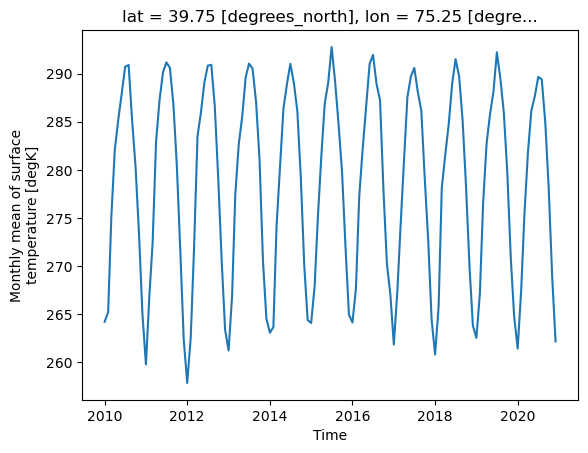

In [6]:
ta.sel(time=slice("2010-01-01", "2020-12-31")).isel(lat=100, lon=150).plot()

xarray under the hood used the `matplotlib` library. Any argument that goes into matplotlib can be passed to xarray


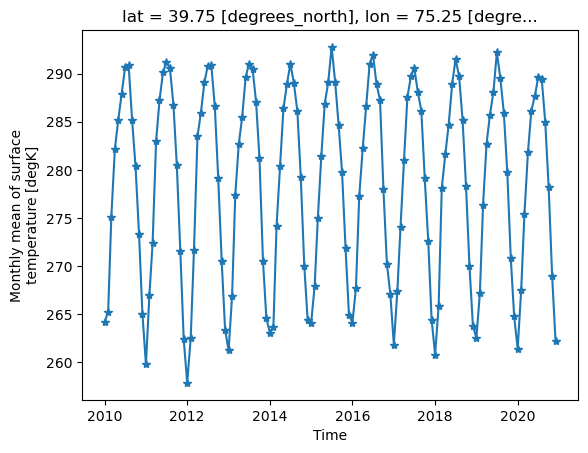

In [7]:
ta.sel(time=slice("2010-01-01", "2020-12-31")).isel(lat=100, lon=150).plot.line("-*")

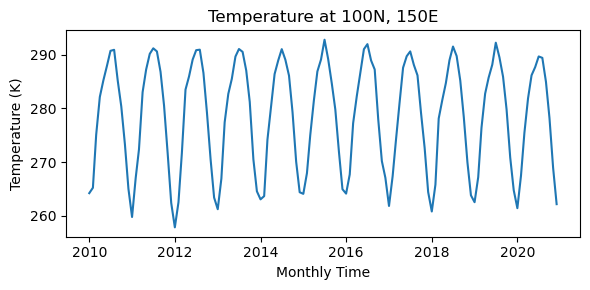

In [8]:
ta.sel(time=slice("2010-01-01", "2020-12-31")).isel(lat=100, lon=150).plot(
    aspect=2, size=3
)
plt.title("Temperature at 100N, 150E")
plt.xlabel("Monthly Time")
plt.ylabel("Temperature (K)")
plt.tight_layout()

### Two dimensional plots


xarray is smart enough that in many cases it can interpret your data and choose an appropriate type.


Text(0, 0.5, 'Latitude')

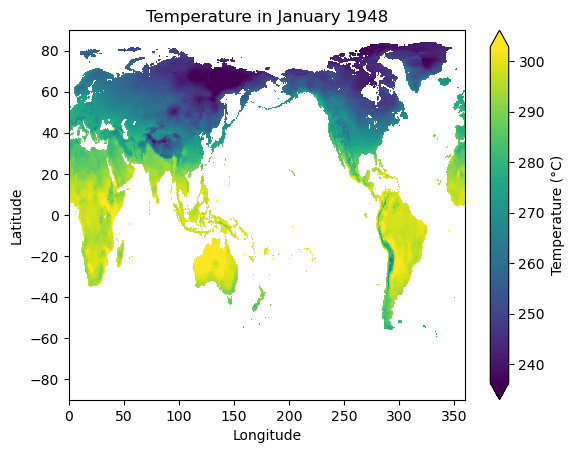

In [9]:
ta.isel(time=0).plot(robust=True, cbar_kwargs={"label": "Temperature (°C)"})
plt.title("Temperature in January 1948")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

### Faceting

Its handy when we want to plot multiple plots along a dimension (e.g. time)


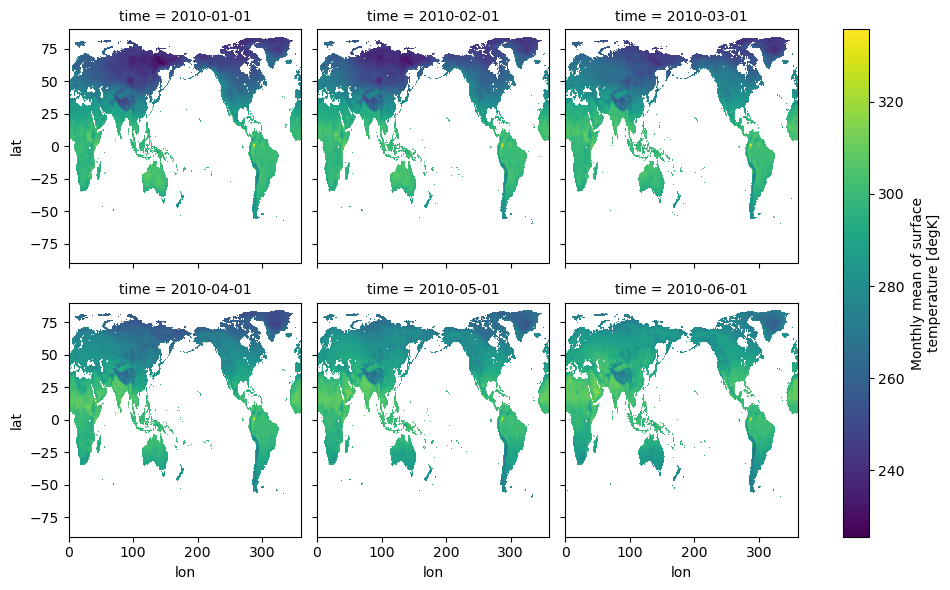

In [10]:
ta_sub = ta.sel(time=slice("2010-01-01", "2010-06-30"))
ta_sub.plot(col="time", col_wrap=3)

### More advanced plots


In general the xarray basic plotting is great for data exploration (quick test).

However, it other more plotting packages were integrated with xarray to produce more complicated plots.


For example code below is how to plot it in various projections, adding coastlines etc.


In [ ]:
# Install the following libraries:
!pip install cartopy 

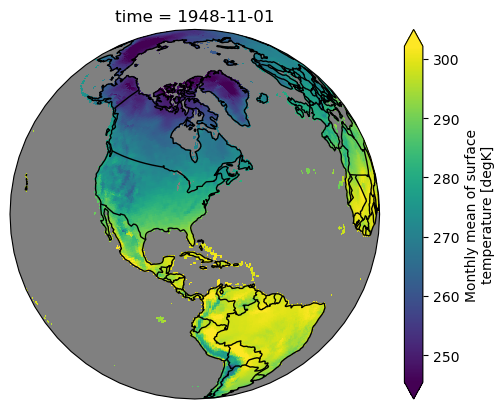

In [12]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

p = ta.isel(time=10).plot(
    subplot_kws=dict(projection=ccrs.Orthographic(-80, 35), facecolor="gray"),
    transform=ccrs.PlateCarree(),
    robust=True,
)

p.axes.coastlines()
p.axes.add_feature(cfeature.BORDERS)

Different projections


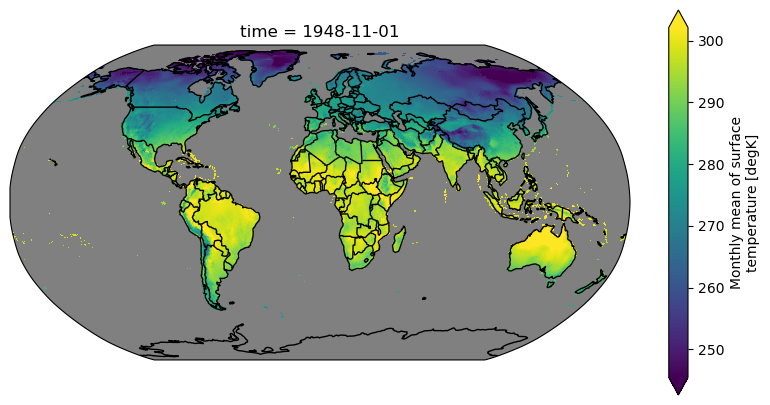

In [13]:
p = ta.isel(time=10).plot(
    subplot_kws=dict(projection=ccrs.Robinson(), facecolor="gray"),
    figsize=(10, 5),
    transform=ccrs.PlateCarree(),
    robust=True,
)

p.axes.coastlines()
p.axes.add_feature(cfeature.BORDERS)

### Interactive plotting


Hover your mouse over the plot to see the temperature at different locations.


In [18]:
import hvplot.xarray

In [25]:
import hvplot.xarray

ta.isel(time=10).hvplot(
    width=800,
    height=400,
    cmap="fire",
    projection=ccrs.Mollweide(),
)

:Image   [lon,lat]   (air)

You may run into issue with the next interactive figure, if you do, you can upgrade the ipywidgets library using the following command:


python -m pip install --upgrade ipywidgets

Make a simple animations


In [23]:
ta.isel(time=range(12)).hvplot(
    width=800,
    height=400,
    cmap="fire",
    # projection=ccrs.Orthographic(-90, 30),
    coastline=True,
    groupby="time",
    widget_type="scrubber",
    widget_location="bottom",
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'c2806d12-b4de-497a-b173-0de2a5a74e9b': {'version…

## 4. Computations


Xarray integrates seamlessly with NumPy, allowing you to apply many familiar NumPy functions directly to xarray objects (DataArrays and Datasets) while preserving their labeled structure and coordinates.


In [ ]:
# For example let calculate log and sin of the air temprature, whatever they mean!
ta_sel = ta.sel(time="2023-08-01")

log_ta = np.log(ta_sel)
sin_ta = np.sin(ta_sel)

fig, axes = plt.subplots(2, 1, figsize=(8, 6))
log_ta.plot(ax=axes[0])
sin_ta.plot(ax=axes[1])

axes[0].set_title("Log of Air Temperature!")
axes[1].set_title("Sine of Air Temperature!")
plt.tight_layout()

In [ ]:
# Operation on two DataArrays
ta_sum = ta_sel + ta_sel
ta_sum.plot()

we can use `isnull()`, `notnull()`, `fillna()`, `dropna()` and a few more to deal with missing data


Plot grids where it is `NaN` and its not `NaN`


In [ ]:
plt.subplot(1, 2, 1)
ta_sel.isnull().plot()
plt.subplot(1, 2, 2)
ta_sel.notnull().plot()

Fill the missing values with 0


In [ ]:
ta_sel.fillna(0).plot(robust=True)

Taking the mean/max/min etc.


In [ ]:
ta_sel_mean = ta_sel.mean()
ta_sel_mean
# Try to sum, std, min, max, median, quantile, etc.

Including labels (dimensions) in our calculations.

For example we can take the mean over lat and lon dimensions to get the global mean of temperature.


In [ ]:
ta_mean = ta.mean(dim=["lat", "lon"])
ta_mean.sel(time=slice("2020-01-01", "2022-12-01")).plot()

### Practice: plot the map of global temp mean from the year 1990 to 2010


In [ ]:
# Your codes here

Solution


In [ ]:
ta.sel(time=slice("1990-01-01", "2010-12-01")).mean(dim="time").plot()

Binning and grouping data using `groupby` and `resample`.


In [ ]:
ta_group = ta.groupby("time.year").mean()
ta_resample = ta.resample(time="Y").mean()
# Notice the dimension of the DataArray is now year instead of time

**Note:**

<u>Grouping</u>:

- Uses the groupby function to group the data by the "year" component of the "time" coordinate. Each group represents a year's worth of data.
- The `mean()` function is then applied within each group, calculating the average value for each year.
- Flexibility: This method offers more flexibility if you need to perform different operations on each year's data (e.g., standard deviation, percentiles). You can iterate over the groups or apply further calculations within the groupby object.

<u>Resampling</u>:

- Uses the resample function to directly change the sampling frequency of the data to "Y" (yearly). This essentially averages all values within each year automatically.
- For simple calculations like computing averages, this approach can be more efficient because it avoids explicit grouping and iteration.
- Applying further operations on individual years requires additional steps.


Calculate moving average:


In [ ]:
annual_ta = ta.groupby("time.year").mean()  # Group the data by year
window_size = 3  # Define the window size for the moving average

# # Calculate the moving average
moving_avg = annual_ta.rolling(year=window_size, center=True).mean()

moving_avg

In [ ]:
# plot the results of moving average

# your codes here

What if we want to resample the data to a different time frequency?


In [ ]:
ta_resample = ta.resample(time="5Y").mean(dim="time")
ta_resample

### Apply a costume function to the data along dimension(s)

Xarray's `apply_ufunction()` is great for applying your costume functions along any dimension of your data.


Lets calculate the trend in annual temperature:


In [ ]:
# define a function to compute a linear trend of a time series (we use numpy.polyfit())
def linear_trend(y):
    if np.isnan(y).any():
        return np.nan
    x = np.arange(len(y))
    pf = np.polyfit(x, y, 1)
    # need to return an xr.DataArray for groupby
    return pf[0]

In [ ]:
# Calculate the annual mean
ta_annual = ta.resample(time="Y").mean()
# Calculate the linear trend
trend_result = xr.apply_ufunc(
    linear_trend,  # The function to apply (linear_trend in this case)
    ta_annual,  # The input data (ta_annual in this case)
    input_core_dims=[
        ["time"]
    ],  # Specifies the core dimensions of the input data (in this case, "time" is the core dimension)
    vectorize=True,  # Vectorize the function (apply element-wise operations)
)

Plot the trend resutls


In [ ]:
trend_result.plot(robust=True)

### Problem 2: Calculating Annual Summer Temperature Anomaly

#### Objective:

To calculate the annual summer temperature anomaly for the entire time period and to visualize the anomaly trend and anomaly map for the year 2023.

#### Hint:

A simple index for anomaly is to subtract the long term mean from data.

#### Procedure:

1. **Summer Month Mask:**

   - Create a mask for summer months (June, July, August) using `ta['time.month']` and `&`.

2. **Apply Mask:**

   - Apply the mask to select only summer months using `ta.where(mask)`. Note: Use the argument `drop=True` in `where()` to exclude months other than summer.

3. **Calculate Climatological Mean:**

   - Compute the climatological mean of summer temperatures (i.e., annual mean). Use `groupby()`

4. **Calculate Anomalies:**

   - Determine anomalies by subtracting the climatological mean from the summer temperature data.

5. **Visualization:**
   - Plot the anomaly for the year 2023 and the global mean (`mean["lat","lon"]`) for the entire time period. Utilize `matplotlib.subplot()` to display them side-by-side.

#### Note:

Keep an eye out for any unusual patterns or trends in the anomalies.


**Solution:**


A. Calculate the summer anomaly


In [ ]:
# Calculate the mask for summer months (June, July, August)
mask = (ta["time.month"] >= 6) & (ta["time.month"] <= 8)

# Apply the mask to select only summer months data
ta_summer = ta.where(mask, drop=True)

# Calculate the annual mean of summer temperatures
ta_summer_annual = ta_summer.groupby("time.year").mean()

# Calculate the climatological mean of summer temperatures
clima_mean = ta_summer_annual.mean(dim="year")

# Calculate the summer temperature anomalies by subtracting the climatological mean
summer_anomalies = ta_summer_annual - clima_mean

B. Plot the anomaly trend and anomaly map for the year 2023


In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

# Plot the summer anomalies for the year 2023
summer_anomalies.sel(year=2023).plot(robust=True, cmap="coolwarm", ax=axs[0])

# Plot the global mean of summer temperature anomalies
summer_anomalies.mean(["lat", "lon"]).plot(ax=axs[1])

# Add an arrow pointing to the anomaly values in the year 2021
axs[1].annotate(
    "Approaching values projected for 2100 :(",
    xy=(2023, summer_anomalies.sel(year=2023).mean(["lat", "lon"])),
    xytext=(1960, summer_anomalies.sel(year=2023).mean(["lat", "lon"]) - 0.5),
    arrowprops=dict(facecolor="black", arrowstyle="->"),
)

plt.tight_layout()

More on 1.5 C and its importance in [IPCC report: chapter 1](https://www.ipcc.ch/sr15/chapter/chapter-1/).

P.S. To be more accurate we need to do a bit more:

- We need to take the area of cells into account when calculating the global mean.
- We need to deal with outliers.
- This dataset is one of the many, other datasets may show different results.
- And anomalies are not distributed uniformly, for example arctic is warming twice as fast the rest of the world, as we have seen it in the last trend analyses.


### Large Data and Speed: The Next Challenge

We've covered the basics of climate data processing in Python. Now, let's tackle the real challenges:

1. **Out-of-memory data:** What happens when datasets are too large to fit in memory?
2. **Speeding up computations:** How can we analyze data faster, especially with large datasets?

In the next session, we'll introduce `Dask`, a powerful tool for handling these issues.


## Introducing Dask


In [ ]:
### Scaling with Dask
import xarray as xr
import dask
import numpy as np
import matplotlib.pyplot as plt
import dask.array

In [ ]:
from dask.distributed import Client
import multiprocessing

In [ ]:
from dask.distributed import Client

# Get the number of cores
n_cores = multiprocessing.cpu_count()
# Specify the number of threads per worker
threads_per_worker = 2  # adjust this based on your workload

client = Client(n_workers=n_cores, threads_per_worker=threads_per_worker)
client

Lets start with a simple example of a 2D array of numbers:


In [ ]:
shape = (1000, 4000)
ones_np = np.ones(shape)
print("Size:", ones_np.nbytes / 1e6, "MB")

We can create an equivalent Dask array using dask.array.ones:


In [ ]:
ones_da = dask.array.ones(shape)
ones_da

# Note: 1 MiB = 1,048,576 bytes

In this example we have not "chunk" the data yet. There is only one chunk with same shape as our Array.


Now lets chunk the data into 1000 by 1000 blocks:


In [ ]:
chunks_size = (1000, 1000)
ones_da = dask.array.ones(shape, chunks=chunks_size)
ones_da

pay close attention to the chunks size and the memory usage.

You can also use the dask.array.visualize() function to visualize the dask graph.


In [ ]:
# Visualize the dask graph
dask.visualize(ones_da)

Similar to numpy, we can perform arithmetic operations on dask arrays:


In [ ]:
# Dask is laze, it graphs the tasks but not doing it
ones_mean = ones_da.mean()
ones_mean

The key distinction between Dask and NumPy lies in Dask's "lazy" evaluation approach, where computations are deferred until explicitly requested.

The provided code represents merely the computation graph, outlining the sequence of operations, rather than executing the computations themselves.

To visualize the computation graph, we can employ the dask.visualize() function:


In [ ]:
dask.visualize(ones_da.mean())

To compute the mean, we can use the .compute() method to trigger the computation and get the result as a NumPy array.


In [ ]:
# To calculate
ones_mean.compute()

### Parallelize the calculation

Now we know about chunking, what about parallel computing.


The following code is designed to take precisely 4 seconds when executed sequentially:


In [ ]:
import time


def inc(x):
    # Takes two seconds to compute
    time.sleep(2)
    return x + 1


def dec(y):
    # Takes one second to compute
    time.sleep(1)
    return y - 1


def add(x, y):
    # Takes one seconds to compute
    time.sleep(1)
    return x + y

In [ ]:
%%time
x = inc(1)
y = dec(2)
z = add(x,y)

with dask.delayed we can make the above computation lazy. Meaning we only design the computation graph but not doing the computation.


In [ ]:
inc = dask.delayed(inc)
dec = dask.delayed(dec)
add = dask.delayed(add)

In [ ]:
%%time
x = inc(1)
y = dec(2)
z = add(x,y)

Note how fast the cell runs! This is because the dask.delayed calls are building up a task graph, but not actually executing it.

Lets visualize the computation graph:


In [ ]:
# Visualize the dask graph for calculation of z
z.visualize(rankdir="LR")

What is your guess for the time it will take to compute z?


In [ ]:
%%time
z.compute()

### Dask-Xarray for Large-Scale Gridded Geospatial Data Analysis

You've already explored the individual strengths of Xarray and Dask - the former providing a familiar and intuitive interface for labeled arrays, and the latter unlocking parallel processing on massive datasets. Now, let's delve into the exciting stuff when they're combined:

**Key Advantages:**

- **Parallel Processing:** Dask distributes data and computations across multiple cores or worker processes, enabling significantly faster analysis on large datasets. Operations like aggregation, reshaping, and arithmetic leverage distributed computing power, drastically reducing analysis times.
- **Lazy Evaluation:** Dask-Xarray adopts a "lazy" approach, deferring actual computations until absolutely necessary.
  - This optimizes resource utilization by focusing only on the required parts of complex workflows, further boosting efficiency.
  - Reproducibility of the research. Computation the metadata than the data is more transferable, especially if the metadata is the same across datasets (e.g. STAC)
- **Streaming:** For datasets exceeding disk capacity, Dask-Xarray employs streaming to process data in chunks, eliminating the need to load everything at once.
- **Familiar API:** Xarray's intuitive API, reminiscent of NumPy and pandas, ensures a consistent experience regardless of data location: in-memory arrays or out-of-memory Dask arrays. This minimizes the learning curve and simplifies code adaptation.
- **Flexibility:** Dask-Xarray adapts to your hardware and software environment, whether you're working on a single workstation, multi-core machine, cluster, or cloud platform.


OK! now we know how to use Dask to scale our computation. Let's go back to our air temprature dataset and see how we can use Dask to scale our computation.


If we just open the DataArrays it will be loaded into memory:


In [ ]:
da = xr.open_dataarray("air.mon.mean.nc")
da

If data is huge then this approach fails! so we need to use `chunks` (remember from dask) argument to load the data in chunks:


In [ ]:
# Open the air temprature Dataset with Dask enabled
da = xr.open_dataarray(
    "air.mon.mean.nc",
    chunks={
        "time": 100,
        "lat": "auto",
        "lon": "auto",
    },
)
da

- The data has been loaded as a Dask array, with the chunks argument determining how the data is partitioned into manageable chunks.

- This implies that the entire dataset is not loaded into memory; instead, a computational graph is constructed.
- This graph consists of tasks that are executed on-demand, following a "lazy" evaluation strategy similar to the example demonstrated at the beginning of the session.


Extract data from the dataset there are two ways:

1. `.data` which returns a dask array
2. `.to_numpy` and `.values`, which means it will call the `compute()`

- Use `.to_numpy` instead of `.values` as it retruns more generlizable array (e.g. sparse arrays)


In [ ]:
da.data

Note that the data is a dask array and lazy!


To get the numpy array use `.to_numpy()` method:


In [ ]:
data = da.to_numpy()
print(type(data))
print(data)

P.S. Don't worry about the nans, this is land temperature data and it is expected to have nans over the ocean and other places.


### Lazy computation


As expected, the computation on xarray when calling chunks is lazy.

It means that the actual computation is deferred until it is explicitly needed.


Lets do an example of a simple calculation with Dask-xarray by taking the mean:


In [ ]:
mean = da.mean()
std = da.std()
mean_std = mean + std
mean_std

Note its fast since its a lazy computation ---> no actual computation is done.


visualize the dask graph for this calculation:


In [ ]:
dask.visualize(mean_std, rankdir="LR")

There are various ways to perform the computation:

1. `.compute()`: returns an xarray object. Recommended for smaller datasets where outputs are small enough to fit into memory.
2. `.load()`: similar to compute but returns a dask object. (Not generally recommended for out-of-memory situations).
3. `.persist():` does the computation but holds the results in the distributed cluster memory. Most common for out-of-memory situations but it requires access to clusters/clouds.


In [ ]:
mean_std_calculated = mean_std.compute()

Now dask is executing the graph and calculating the result.


In [ ]:
mean_std_calculated

In [ ]:
mean_std.load()

Calculate the trend but with Dask


In [ ]:
da_annual = da.resample(time="Y").mean()
da_annual = da_annual.chunk(dict(time=-1))
da_annual = da_annual.chunk({"lat": 100, "lon": 100, "time": -1})
da_annual

In [ ]:
# Define a function that calculates the linear trend using numpy polyfit
def linear_trend(y):
    # y is the variable of interest
    # Check if there is any NaN in y
    if np.any(np.isnan(y)):
        # Return NaN as slope
        return np.nan
    else:
        # Create an array of indices as x
        x = np.arange(len(y))
        # Return only the slope of the linear fit
        return np.polyfit(x, y, 1)[0]


trend = xr.apply_ufunc(
    linear_trend,
    da_annual.variable,
    input_core_dims=[["time"]],
    output_core_dims=[[]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float],
)
trend_dataarray = xr.DataArray(
    trend, dims=["lat", "lon"], coords={"lat": ds.lat, "lon": ds.lon}
)
trend_dataarray.plot()

In [ ]:
from dask import optimize

(optimized,) = optimize(trend.data)
optimized.visualize()

When using Dask to parallelize computations, there can be overhead associated with parallelization, chunking, and data movement between workers. In some cases, for smaller datasets, the overhead of parallelization can outweigh the benefits of parallel processing, resulting in longer execution times compared to a non-parallelized approach.

In this specific case, with a small array (77 time steps, 360 latitudes, and 720 longitudes), the overhead introduced by Dask's parallelization may dominate the computation time. Dask is designed to handle larger-than-memory datasets efficiently by breaking them into smaller chunks and processing them in parallel. However, for smaller datasets that can fit into memory, the overhead of parallelization may outweigh the benefits.


### Practice:

- Try to chunk the data along the time dimension and calculate the linear trend using the apply_ufunc function. What do you observe?
- Also experiement with different lat and lon chunk sizes and examine the difference in execution time.


Close Dask client


In [ ]:
client.close()

## Downloading Data from Microsoft Planetary Computer

The [Microsoft Planetary Computer](https://planetarycomputer.microsoft.com/) is a powerful cloud platform specifically designed for researchers in climate and environmental fields. It provides **unprecedented access to a vast repository of data**, including:

- **Climate observations**
- **Satellite imagery**
- **Model outputs**

The Planetary Computer leverages the **STAC API (SpatioTemporal Asset Catalog)**, a standardized interface that makes it easy to discover, search, and access datasets based on specific criteria like location, time period, and data type.

**Here's a quick overview of the process:**

**1. Explore the Data Catalog:** Browse the Planetary Computer's extensive collection of datasets through the user-friendly Data Catalog. Filter by parameters like spatial coverage, temporal resolution, and data type to find the resources relevant to your research.

**2. Utilize the STAC API:** Interact with the data programmatically using the STAC API. This protocol enables flexible querying, subsetting, and retrieval of specific data segments you need for your analysis.

**3. Download or Process Data:** Download the retrieved data directly to your local machine or leverage cloud-based processing environments within the Planetary Computer platform.

**Additional Resources:**

- **[Official Documentation](https://planetarycomputer.microsoft.com/docs/overview/about)** .
- **[Catalog](https://planetarycomputer.microsoft.com/catalog)**
- **[Community](https://github.com/microsoft/PlanetaryComputer)**


Load the libraries


In [ ]:
import pystac_client
import planetary_computer
import odc.stac
import matplotlib.pyplot as plt
from pystac.extensions.eo import EOExtension as eo

To access the data, we’ll create a pystac_client.Client. We’ll explain the modifier part later on, but it’s what lets us download the data assets.


In [ ]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

Define area of interest


In [ ]:
bbox_of_interest = [-122.001, 47, -122, 47.001]
time_of_interest = "2021-01-01/2021-12-31"
# area_of_interest = {"type": "Point", "coordinates": [-122.2751, 47.5469]}

Search the catalog for the landsat data collection 2 for the year 2021


In [ ]:
search = catalog.search(
    collections=["landsat-c2-l2"],
    # intersects=area_of_interest,
    bbox=bbox_of_interest,
    datetime=time_of_interest,
    query={"eo:cloud_cover": {"lt": 10}},
)

items = search.item_collection()
print(f"Returned {len(items)} Items")

Inspect one item to see what it looks like


In [ ]:
items = list(items)
items[0]

Download the data where each item is a time step


In [ ]:
import xarray as xr

bands_of_interest = ["nir08"]
data_list = []

for item in items:
    data = odc.stac.stac_load(
        [item], bands=bands_of_interest, bbox=bbox_of_interest
    ).isel(time=0)
    data_list.append(data)

combined_data = xr.concat(data_list, dim="item")
combined_data

Do some plotting


In [ ]:
combined_data.nir08.mean(["x", "y"]).plot()

In [ ]:
combined_data.nir08.mean("item").plot()

In [ ]:
data["nir08"].plot()